## Logistic Regression Demonstration
We will implement logistic regression and demonstrate how the outputs can be interpreted as probabilities. We will also explore essential performance metrics and use optimised approach using `sklearn` on the Titanic dataset.

In [3]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import warnings; warnings.filterwarnings('ignore')

We’ll use a cleaned Titanic dataset with selected features such as demographics (`Sex`, `Age`, `Family_size`, `Title_*)`, socio-economic details (`Pclass_1`, `Pclass_2`, `Pclass_3`, `Fare`) and embarking details (`Emb_1`, `Emb_2`, `Emb_3`)

The target feature is `Survived` (1 = survived, 0 = did not survive)

In [14]:
# Binary Classification Example: Email Spam Detection

# Sample data (features: email_length, num_links, has_urgent_words)
emails = [
    [50, 2, 0],    # Short email, 2 links, no urgent words
    [200, 15, 1],  # Long email, many links, urgent words
    [30, 1, 0],   
    [50, 10, 0] # Short email, 1 link, no urgent words
]
labels = [0, 1, 0, 1]  # 0: Not Spam, 1: Spam

# Train model
model = LogisticRegression()
model.fit(emails, labels)

# Let's see what the model learned
print("Learned Weights:", model.coef_)
print("Learned Bias:", model.intercept_)

# New email to predict
new_email = [[100, 12, 1]]

probability = model.predict_proba(new_email)
print("Probabilities [Not Spam, Spam]:", probability[0])
print(f"Probability of Spam: {probability[0][1]:.2%}")

# Step-by-step calculation
print("\n--- Manual Calculation ---")
weights = model.coef_[0]
bias = model.intercept_[0]

score = (weights[0] * 100) + (weights[1] * 12) + (weights[2] * 1) + bias
print(f"Raw Score: {score}")

# Step 3: Convert score to probability (we'll learn this in Topic 6)
probability = model.predict_proba(new_email)[0][1]
print(f"Probability of Spam: {probability:.2%}")

# Step 4: Make decision (if probability > 0.5, predict Spam)
prediction = model.predict(new_email)
print(f"Final Prediction: {'Spam' if prediction[0] == 1 else 'Not Spam'}")


Learned Weights: [[1.03963869e-01 6.27528398e-01 5.15526592e-06]]
Learned Bias: [-9.00074675]
Probabilities [Not Spam, Spam]: [1.32872715e-04 9.99867127e-01]
Probability of Spam: 99.99%

--- Manual Calculation ---
Raw Score: 8.925986034863254
Probability of Spam: 99.99%
Final Prediction: Spam


Linear Regression Predictions:
Study Hours: 0 → Prediction: -0.36
Study Hours: 2 → Prediction: 0.02
Study Hours: 4 → Prediction: 0.40
Study Hours: 6 → Prediction: 0.79
Study Hours: 8 → Prediction: 1.17
Study Hours: 10 → Prediction: 1.55


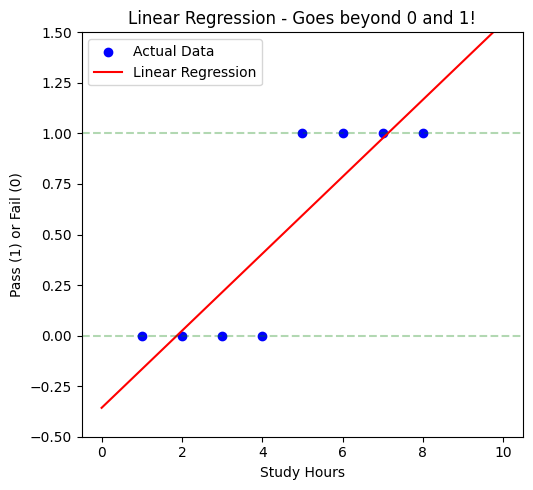

In [11]:

study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
passed = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # 0 = Fail, 1 = Pass

# Let's try Linear Regression (WRONG approach)
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(study_hours, passed)

# Predict for different study hours
test_hours = np.array([0, 2, 4, 6, 8, 10]).reshape(-1, 1)
linear_predictions = linear_model.predict(test_hours)

print("Linear Regression Predictions:")
for hours, pred in zip(test_hours.flatten(), linear_predictions):
    print(f"Study Hours: {hours} → Prediction: {pred:.2f}")
# Plot the data
plt.figure(figsize=(10, 5))

# Linear Regression attempt
plt.subplot(1, 2, 1)
plt.scatter(study_hours, passed, color='blue', label='Actual Data')
plt.plot(test_hours, linear_predictions, color='red', label='Linear Regression')
plt.axhline(y=0, color='green', linestyle='--', alpha=0.3)
plt.axhline(y=1, color='green', linestyle='--', alpha=0.3)
plt.xlabel('Study Hours')
plt.ylabel('Pass (1) or Fail (0)')
plt.title('Linear Regression - Goes beyond 0 and 1!')
plt.legend()
plt.ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()

In [16]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Sample email features: [email_length, num_links, has_urgent_words]
email = [100, 12, 1]

# Pretend the model learned these values
weights = np.array([0.01, 0.15, 2.0])
bias = -2.5

print("=" * 60)
print("LOGISTIC REGRESSION: Step by Step")
print("=" * 60)

# STEP 1: Linear calculation (just like Linear Regression)
z = np.dot(weights, email) + bias
print(f"\nStep 1 - Linear Calculation:")
print(f"z = (0.01 × 100) + (0.15 × 12) + (2.0 × 1) + (-2.5)")
print(f"z = 1.0 + 1.8 + 2.0 - 2.5")
print(f"z = {z}")
print(f"→ This could be ANY number (positive or negative)")

# STEP 2: Apply Sigmoid transformation
probability = sigmoid(z)
print(f"\nStep 2 - Apply Sigmoid:")
print(f"probability = sigmoid({z})")
print(f"probability = 1 / (1 + e^(-{z}))")
print(f"probability = {probability:.4f}")
print(f"→ Now it's between 0 and 1! ({probability:.2%})")

# STEP 3: Convert to class
predicted_class = 1 if probability >= 0.5 else 0
print(f"\nStep 3 - Convert to Class:")
print(f"Since {probability:.4f} >= 0.5: Predict class {predicted_class}")
print(f"→ Final Answer: {'Spam' if predicted_class == 1 else 'Not Spam'}")

LOGISTIC REGRESSION: Step by Step

Step 1 - Linear Calculation:
z = (0.01 × 100) + (0.15 × 12) + (2.0 × 1) + (-2.5)
z = 1.0 + 1.8 + 2.0 - 2.5
z = 2.3
→ This could be ANY number (positive or negative)

Step 2 - Apply Sigmoid:
probability = sigmoid(2.3)
probability = 1 / (1 + e^(-2.3))
probability = 0.9089
→ Now it's between 0 and 1! (90.89%)

Step 3 - Convert to Class:
Since 0.9089 >= 0.5: Predict class 1
→ Final Answer: Spam


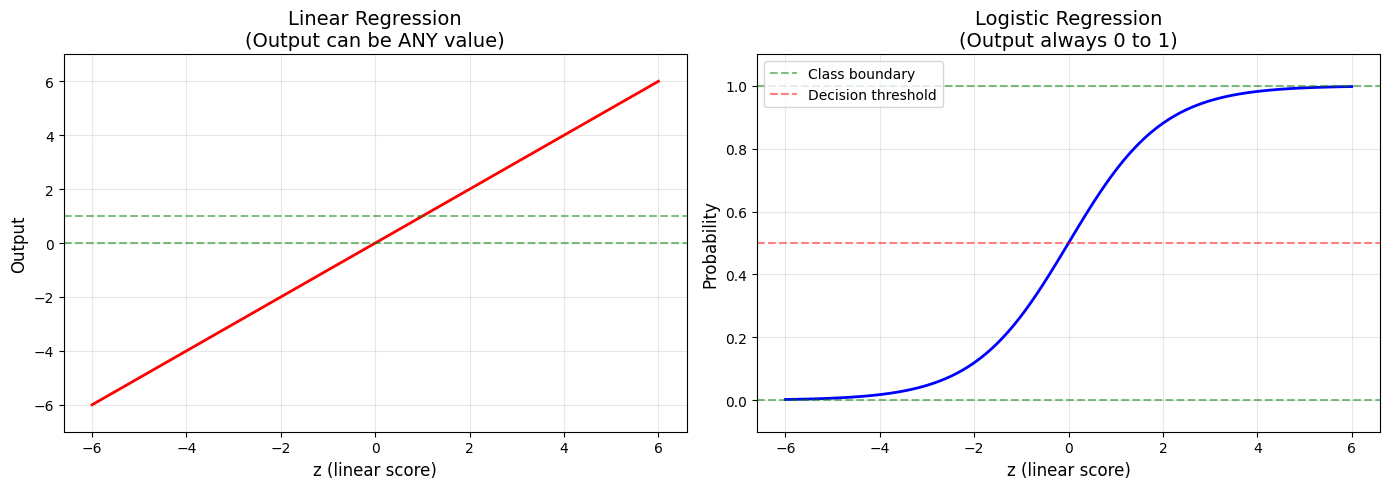

In [17]:


# Range of z values
z_range = np.linspace(-6, 6, 100)

# Linear Regression output (just z)
linear_output = z_range

# Logistic Regression output (sigmoid of z)
logistic_output = sigmoid(z_range)

# Plot both
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Linear Regression
ax1.plot(z_range, linear_output, 'r-', linewidth=2)
ax1.axhline(y=0, color='green', linestyle='--', alpha=0.5)
ax1.axhline(y=1, color='green', linestyle='--', alpha=0.5)
ax1.set_xlabel('z (linear score)', fontsize=12)
ax1.set_ylabel('Output', fontsize=12)
ax1.set_title('Linear Regression\n(Output can be ANY value)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-7, 7)

# Logistic Regression
ax2.plot(z_range, logistic_output, 'b-', linewidth=2)
ax2.axhline(y=0, color='green', linestyle='--', alpha=0.5, label='Class boundary')
ax2.axhline(y=1, color='green', linestyle='--', alpha=0.5)
ax2.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Decision threshold')
ax2.set_xlabel('z (linear score)', fontsize=12)
ax2.set_ylabel('Probability', fontsize=12)
ax2.set_title('Logistic Regression\n(Output always 0 to 1)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.1, 1.1)
ax2.legend()

plt.tight_layout()
plt.show()

In [2]:
df = pd.read_csv('titanic.csv')

X = df.drop(['PassengerId', 'Survived'], axis = 1)
y = df['Survived']

print(f'Input shape: {X.shape}')
print(f'Survival rate: {y.mean():.1%}')

Input shape: (891, 15)
Survival rate: 38.4%


The dataset is somewhat imbalanced. The `train_test_split()` function splits arrays or matrices into random train and test subsets. We will **stratify** on the target feature, that is, we will keep the proportion of positive class roughly the same in test and training sets.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
print(f'Train: {X_train.shape[0]}, Test: {X_test.shape[0]}')
print(f'Train survival rate: {y_train.mean():.1%}, Test survival rate: {y_test.mean():.1%}')

Train: 712, Test: 179
Train survival rate: 38.3%, Test survival rate: 38.5%


Let's train the model using `sklearn.LogisticRegression`. You can try out different number of iterations. Unlike our previous arbitrary parameters approach, `sklearn` uses an optimisation algorithm to minimise log loss efficiently.

In [4]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
print(f'Intercept (bias): {model.intercept_[0]:.3f}')
print(f'Coefficients: {len(model.coef_[0])} features')

Intercept (bias): 1.659
Coefficients: 15 features


A point to note here is that `sklearn` offers several solvers for logistic regression. Some use gradient descent whereas others use higher order gradients or matrices (default is `lbfgs`). These are beyond the scope of this discussion. 

Model outputs probabilities through sigmoid, then converts to binary predictions.

Let's see the probabilities and class predictions

In [5]:
y_proba = model.predict_proba(X_test)  # Probabilities
y_pred = model.predict(X_test)  # Predictions
results_df = pd.DataFrame({'Actual': y_test.iloc[:5].values,'Prob_Die': y_proba[:5, 0],'Prob_Survive': y_proba[:5, 1],'Prediction': y_pred[:5]})
print(results_df.round(3))

   Actual  Prob_Die  Prob_Survive  Prediction
0       0     0.955         0.045           0
1       0     0.930         0.070           0
2       0     0.680         0.320           0
3       0     0.931         0.069           0
4       1     0.051         0.949           1


Let's first check the log loss on both training and testing sets

In [6]:
test_log_loss = log_loss(y_test, y_proba)
print(f'Log Loss (Test): {test_log_loss:.3f}')

y_proba_train = model.predict_proba(X_train) 
y_pred_train = model.predict(X_train)  
train_log_loss = log_loss(y_train, y_proba_train)
print(f'Log Loss (Train): {train_log_loss:.3f}')

Log Loss (Test): 0.455
Log Loss (Train): 0.410


A lower log loss indicates better performance. The test loss being slightly higher than the train loss suggests the model generalises well without overfitting.

### Evaluation
Let's compare the confusion matrices for training and testing and see how classification and misclassification counts look like for both

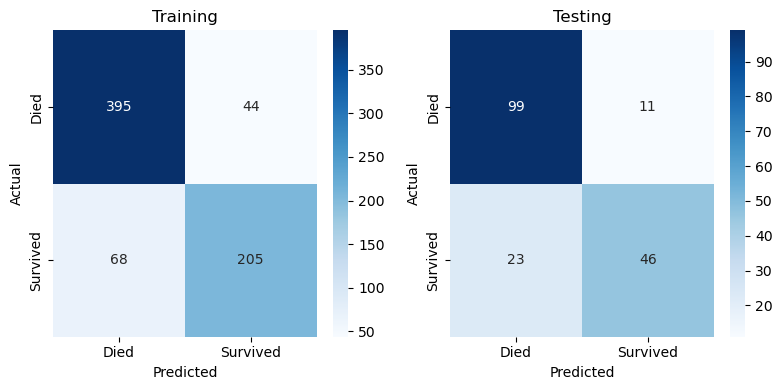

In [7]:
cm_train = confusion_matrix(y_train, y_pred_train)  # Train confusion matrix
cm_test = confusion_matrix(y_test, y_pred)  # Test confusion matrix
fig, axes = plt.subplots(1, 2, figsize = (8, 4))
sns.heatmap(cm_train, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Died', 'Survived'], yticklabels = ['Died', 'Survived'], ax = axes[0]); axes[0].set_title('Training'); axes[0].set_ylabel('Actual'); axes[0].set_xlabel('Predicted')
sns.heatmap(cm_test, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Died', 'Survived'], yticklabels = ['Died', 'Survived'], ax = axes[1]); axes[1].set_title('Testing'); axes[1].set_ylabel('Actual'); axes[1].set_xlabel('Predicted'); plt.tight_layout();

We can see that these are mostly proportionate between train and test sets, which suggests low possibility of overfitting. Let's look at the other metrics as well.

In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label = 1)  # pos_label = 1 indicates positive class is "1"
f1 = f1_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label = 0)  # pos_label = 0 indicates positive class is "0"

print(f'Accuracy:    {accuracy:.3f}')
print(f'Precision:   {precision:.3f}  (of predicted survivors, how many actually survived)')
print(f'Recall:      {recall:.3f}  (of actual survivors, how many we caught)')
print(f'Specificity: {specificity:.3f}  (of actual deaths, how many we caught)')
print(f'F1-Score:    {f1:.3f}')

Accuracy:    0.810
Precision:   0.807  (of predicted survivors, how many actually survived)
Recall:      0.667  (of actual survivors, how many we caught)
Specificity: 0.900  (of actual deaths, how many we caught)
F1-Score:    0.730


We can also print an overall classification report for the model

In [9]:
print(classification_report(y_test, y_pred, target_names = ['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.81      0.90      0.85       110
    Survived       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



To see the effect of changing the threshold on the predictions, let's define a function which assigns labels according to provided threshold

In [10]:
y_proba = model.predict_proba(X_test)[:, 1] # Outputs [p(class0), p(class1)]
def predict(y_proba, threshold): return (y_proba >= threshold).astype(int)

In [11]:
y_pred_low = predict(y_proba, 0.3)  # Cutoff of 0.3
print(classification_report(y_test, y_pred_low, target_names = ['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.87      0.72      0.79       110
    Survived       0.65      0.83      0.73        69

    accuracy                           0.76       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.76      0.76       179



In [12]:
y_pred_low = predict(y_proba, 0.9)  # Cutoff of 0.9
print(classification_report(y_test, y_pred_low, target_names = ['Died', 'Survived']))

              precision    recall  f1-score   support

        Died       0.69      0.99      0.81       110
    Survived       0.95      0.28      0.43        69

    accuracy                           0.72       179
   macro avg       0.82      0.63      0.62       179
weighted avg       0.79      0.72      0.66       179



The evaluation metrics change with threshold. Let's plot a precision recall curve for different values of threshold.

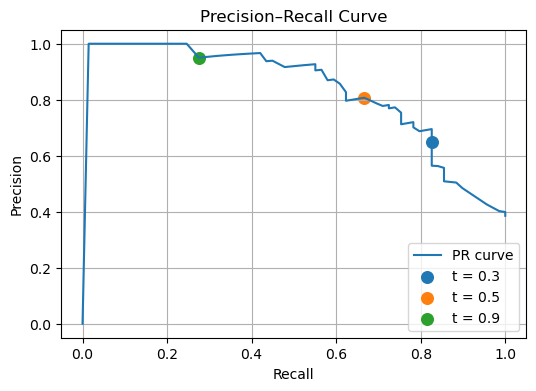

In [13]:
prec, rec, ths = [], [], np.linspace(0, 1, 101)

for t in ths:
    y_pred = predict(y_proba, t)
    prec.append(precision_score(y_test, y_pred, zero_division = 0))
    rec.append(recall_score(y_test, y_pred))

plt.figure(figsize = (6, 4))

plt.plot(rec, prec, label = 'PR curve')

for t in [0.3, 0.5, 0.9]:
    idx = np.argmin(np.abs(ths - t))
    plt.scatter(rec[idx], prec[idx], s = 70, label = f't = {t}')
    
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision–Recall Curve'); plt.legend(); plt.grid(True)

Similarly, the ROC curve

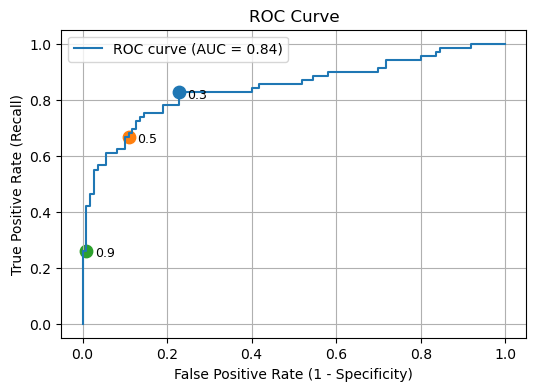

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)  # Compute ROC curve values
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc:.2f})')

# Find closest threshold index
for t in [0.3, 0.5, 0.9]:
    idx = (np.abs(thresholds - t)).argmin()
    plt.scatter(fpr[idx], tpr[idx], s = 80, marker = 'o')
    plt.text(fpr[idx] + 0.02, tpr[idx] - 0.02, f'{t}', fontsize = 9)

plt.xlabel('False Positive Rate (1 - Specificity)'); plt.ylabel('True Positive Rate (Recall)'); plt.title('ROC Curve'); plt.legend(); plt.grid(True)

Let's see the impact of positive class choice on performance metrics

In [15]:
print('Survived as Positive Class')
print(f'Precision:\t{precision:.3f} (predicted survivors who actually survived)\nRecall:\t\t{recall:.3f} (actual survivors we identified)')

precision_died = precision_score(y_test, y_pred, pos_label=0)  # Flip to 'died' as positive class
recall_died = recall_score(y_test, y_pred, pos_label=0)

print('\nDied as Positive Class')
print(f'Precision:\t{precision_died:.3f} (predicted deaths who actually died)\nRecall:\t\t{recall_died:.3f} (actual deaths we identified)')

Survived as Positive Class
Precision:	0.807 (predicted survivors who actually survived)
Recall:		0.667 (actual survivors we identified)

Died as Positive Class
Precision:	0.615 (predicted deaths who actually died)
Recall:		1.000 (actual deaths we identified)


This is only a preliminary analysis. You are encouraged to explore the documentations further.